In [16]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

In [17]:
mnist=input_data.read_data_sets("../MNIST_data/",one_hot=True)
path='./save/simple_mnist.ckpt'
# print(mnist.train.images.shape,mnist.train.labels.shape)

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz


In [18]:
saver = tf.train.Saver()
sess=tf.InteractiveSession()
x=tf.placeholder(tf.float32,[None,784])
W1=tf.Variable(tf.zeros([784,30]),name='w1')
b1=tf.Variable(tf.zeros([30]),name='b1')
y1=tf.nn.sigmoid(tf.matmul(x,W1)+b1)
W2=tf.Variable(tf.zeros([30,10]),name='w2')
b2=tf.Variable(tf.zeros([10]),name='b2')
y=tf.nn.softmax(tf.matmul(y1,W2)+b2)

y_=tf.placeholder(tf.float32,[None,10])
cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=[1]))
train_step=tf.train.GradientDescentOptimizer(0.3).minimize(cross_entropy)
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))


In [19]:
tf.global_variables_initializer().run()

for i in range(500):
    batch_xs,batch_ys=mnist.train.next_batch(100)
    train_step.run({x:batch_xs,y_:batch_ys})
    if i%100 == 0:
        print(accuracy.eval({x:mnist.test.images,y_:mnist.test.labels}))
saver.save(sess,save_path=path)    
corrcet_result=tf.argmax(y,1)
# print(sess.run(correct_prediction))

print(accuracy.eval({x:mnist.test.images,y_:mnist.test.labels}))
test_x,test_y=mnist.train.next_batch(1)
# print(test_x,test_y)
print(corrcet_result.eval({x:test_x}))

0.098
0.1136
0.2446
0.2722
0.2901
0.3124
[4]


[0 9 6 6 7 5 1 7 9 1 3 1 4 3 1]


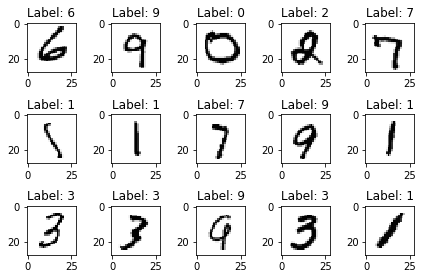

In [49]:
test_x,test_y=mnist.train.next_batch(15)
test_x,test_y=mnist.train.next_batch(15)
print(corrcet_result.eval({x:test_x}))
fig = plt.figure()
for i in range(0,15,1):
    image=test_x[i].reshape(28,28)
    lable=np.argmax(test_y[i])
    plt.subplot(3,5,i+1) # 绘制前15个手写体数字，以3行6列子图形式展示
    plt.tight_layout() # 自动适配
    plt.imshow(image, cmap='Greys') # 使用灰色显示像素灰度值
    plt.title("Label: {}".format(lable)) # 设置标签为子图标题